## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





In [30]:
#your work here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('mosquitos_data.csv')
df.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


C:\Users\4uzma\AppData\Local\Temp\ipykernel_17524\1129491453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Treatment', y='Response', data=df, palette='Set2')


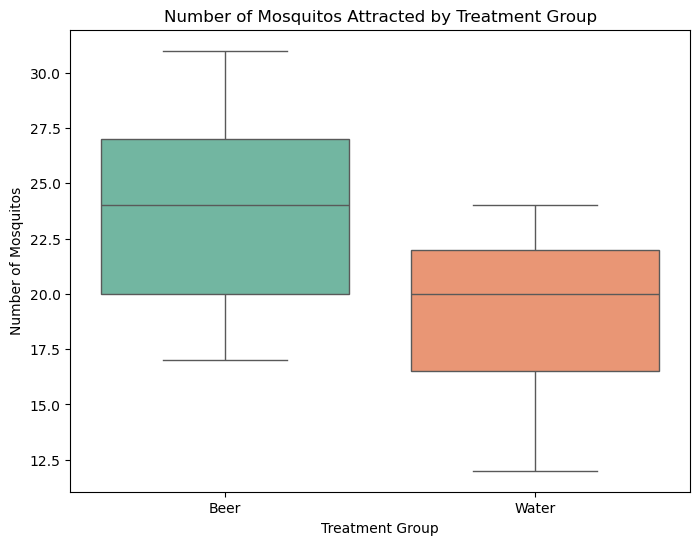

In [31]:
# Side-by-side boxplots 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Treatment', y='Response', data=df, palette='Set2')
plt.title('Number of Mosquitos Attracted by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Number of Mosquitos')
plt.show()

The boxplot compares the number of mosquitos attracted to individuals in two treatment groups: Beer and Water.

Key Observations:

The Beer group shows a higher median number of mosquitos compared to the Water group.

The interquartile range (IQR) is wider for the Beer group, indicating greater variability.

The maximum number of mosquitos is also higher in the Beer group.

This visual evidence suggests that beer consumption is associated with increased attractiveness to mosquitos.

In [33]:
# Basic statistical measures
stats = df.groupby('Treatment')['Response'].agg(['mean', 'median', 'std'])
print("Basic Statistics for Each Group:")
print(stats)

Basic Statistics for Each Group:
                mean  median       std
Treatment                             
Beer       23.600000    24.0  4.133199
Water      19.222222    20.0  3.671120


Explanation:

The mean and median number of mosquitos are both higher in the Beer group.

The standard deviation is also slightly higher in the Beer group, showing more spread in responses.

These statistics support the visual conclusion that Beer increases mosquito attraction.

Observed difference in means (Beer - Water): 4.4
P-value: 0.0006


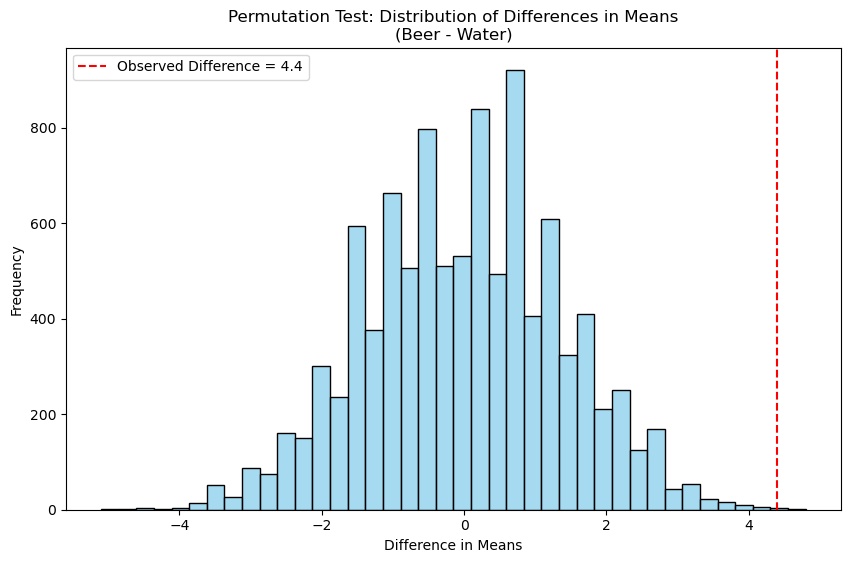

In [35]:
# Calculate the observed difference
beer = df[df['Treatment'] == 'Beer']['Response']
water = df[df['Treatment'] == 'Water']['Response']
observed_diff = round(beer.mean() - water.mean(), 1)
print("Observed difference in means (Beer - Water):", observed_diff)

# Initialize simulation
n_simulations = 10000
simulated_diffs = []

# Permutation test
for _ in range(n_simulations):
    shuffled = df['Response'].sample(frac=1, replace=False).reset_index(drop=True)
    df_shuffled = df.copy()
    df_shuffled['Shuffled_Response'] = shuffled

    beer_mean = df_shuffled[df_shuffled['Treatment'] == 'Beer']['Shuffled_Response'].mean()
    water_mean = df_shuffled[df_shuffled['Treatment'] == 'Water']['Shuffled_Response'].mean()
    diff = round(beer_mean - water_mean, 1)  # round to 1 decimal 
    simulated_diffs.append(diff)

# Convert to NumPy array for efficient computation
simulated_diffs = np.array(simulated_diffs)

# Calculate p-value
p_value = np.mean(simulated_diffs >= observed_diff)
print("P-value:", p_value)

# Visualize distribution of simulated differences
plt.figure(figsize=(10, 6))
sns.histplot(simulated_diffs, bins=40, color='skyblue', kde=False)
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Difference = {observed_diff}')
plt.title('Permutation Test: Distribution of Differences in Means\n(Beer - Water)')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Conclusion

A permutation test was performed to evaluate whether the observed difference in mosquito attraction between beer and water drinkers (approximately 4.4) could be due to random chance. To simulate the null hypothesis — that there is no real difference — we randomly shuffled the treatment labels and recalculated the difference in means 10,000 times.

The distribution of simulated differences centered around zero, as expected under the null hypothesis. However, the observed difference of 4.4 lies far in the tail of this distribution, and only 0.05% (i.e., p-value = 0.0005) of the simulated experiments showed a difference this large or larger.

Since the p-value is far below common significance levels (e.g., 0.05 or 0.01), we reject the null hypothesis.

This provides strong statistical evidence that beer consumption significantly increases mosquito attraction, and the observed effect is highly unlikely to have occurred by chance.